<a href="https://colab.research.google.com/github/AishwaryaKaranth/final-year-project/blob/master/final_year_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Resizing

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
!unzip '/content/gdrive/MyDrive/Final year Project/Galaxy Classification/Dataset/images_training_rev1.zip' -d '/content/gdrive/MyDrive/Final year Project/Galaxy Classification/Dataset/Training set/'

In [ ]:
!pip install Pillow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import PIL
from PIL import Image
import os

In [ ]:
def Resizing(path1,currentpath):
  for im in os.listdir(path1):
    try:
      img=Image.open(os.path.join(path1,im))
      resized=img.resize((224,224))
      resized.save(currentpath+'Resized/'+im[:-4]+'resized.jpg', 'JPEG',quality=90)
      print('resizing')
    except Exception as e:
      print(str(e))

In [ ]:
currentpath='/content/gdrive/MyDrive/Final year Project/Galaxy Classification/Dataset/'
path1=currentpath+'Training set/images_training_rev1/'

In [ ]:
Resizing(path1,currentpath)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
tr=os.listdir(path1)
re=os.listdir(currentpath+'Resized/Resized_Training/')
print(len(tr),' , ',len(re))

61578  ,  61578


All the 61578 images in the training set have been resized to 224*224


##Data Augmentation by Rotation

In [ ]:
currentpath='/content/gdrive/MyDrive/Final year Project/Galaxy Classification/Dataset/'
path1=currentpath+'Resized/Resized_Training/'

In [ ]:
import PIL
from PIL import Image
import os
import random

In [ ]:
def DA(path1,currentpath):
  for im1 in os.listdir(path1):
    img=Image.open(os.path.join(path1,im1))
    for i in range(1,5):
      try:
        angle=random.uniform(1,360)
        rot = img.rotate(angle)
        rot.save(currentpath+'/Rotation/'+im1[:-4]+str(i)+'rotated.jpg', 'JPEG',quality=90)
        print('rotating')
      except Exception as e:
        print(str(e))

In [ ]:
DA(path1,currentpath)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
path2='/content/gdrive/MyDrive/Galaxy Classification Code/Rotation/'
rot=os.listdir(path2)
print(61578*4,' , ',len(rot))

There are 61578*4=246312 images now in the dataset


# Median Filtering

In [ ]:
import PIL
from PIL import Image,ImageFilter
import os

In [ ]:
def median_cal(path1,path2):
    images=os.listdir(path1)
    for image in images:
        full_path=os.path.join(path1,image)
        try :
            print(full_path)
            I=Image.open(full_path)
            modified= I.filter(ImageFilter.MedianFilter(size = 3))  
            destn=os.path.join(path2,str(image[:-4]))
            destn+='_md.jpg'
            print(destn)
            modified.save(destn,"JPEG",quality=90)
        except Exception as e:
            print(str(e))


In [ ]:
path1='./Rotation'
len(os.listdir(path1))
path2='./Median'
median_cal(path1,path2)


#Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [ ]:
import os
import cv2
import numpy as np

In [ ]:
def he_Equ(path1,path2):
    images=os.listdir(path1)
    for image in images:
        full_path=os.path.join(path1,image)
        try :
            orig=cv2.imread(full_path)   # Loading Source File images.
            ycb=cv2.cvtColor(orig,cv2.COLOR_BGR2LAB) # Converting RGB to LAB colorscale
            imgs=cv2.split(ycb)  # Splitting Channels of LAB Colorscale.
            clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(3,3)) # Creating CLAHE(Clip limit:sets threshhold for contrast limiting.)
           # tilegridesize:used for subimages for applying clahe.
            imgs[0]= clahe.apply(imgs[0]) # Applying Clahe on luminescence channel
            lab=cv2.merge(imgs)   # Merging channels of LAB.
            lab=cv2.cvtColor(lab,cv2.COLOR_LAB2BGR) # Converting back LAB to RGB color scale. 
            destn=os.path.join(path2,str(image[:-4]))
            destn=destn+'_he.jpg'
            print(destn)
            cv2.imwrite(destn,lab). # Storing the HE images in Destination Folder.
        except Exception as e:
            print(str(e)) 

In [ ]:
path1='./MedianFilter'
len(os.listdir(path1))
path2='./he1'
he_Equ(path1,path2)

# VGG16 Architecture

In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import RMSprop

In [2]:
def ConvLayers(layers, model, filters):
  for i in range(layers):
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(filters, 3,3,activation='relu'))
  model.add(MaxPooling2D((2,2),strides=(1,1),padding="same"))

In [3]:
def FCLayers(model):
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

In [4]:
def VGG16_arc():
  model=Sequential()
  ConvLayers(2,model,64)
  ConvLayers(2,model,128)
  ConvLayers(3,model,256)
  ConvLayers(3,model,512)
  ConvLayers(3,model,512)
  model.add(Flatten())
  FCLayers(model)
  FCLayers(model)
  model.add(Dense(37,activation='sigmoid'))
  #model.add(Dense(3,activation='softmax'))
  return model

In [5]:
#Model compilation
optimizer = RMSprop(lr=1e-6) #can be later tweaked
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)


In [6]:
model.build(input_shape=(None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 75, 75, 64)        1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 77, 77, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         7

In [7]:
layer_names = [layer.name for layer in model.layers]
layer_names

['zero_padding2d',
 'conv2d',
 'zero_padding2d_1',
 'conv2d_1',
 'max_pooling2d',
 'zero_padding2d_2',
 'conv2d_2',
 'zero_padding2d_3',
 'conv2d_3',
 'max_pooling2d_1',
 'zero_padding2d_4',
 'conv2d_4',
 'zero_padding2d_5',
 'conv2d_5',
 'zero_padding2d_6',
 'conv2d_6',
 'max_pooling2d_2',
 'zero_padding2d_7',
 'conv2d_7',
 'zero_padding2d_8',
 'conv2d_8',
 'zero_padding2d_9',
 'conv2d_9',
 'max_pooling2d_3',
 'zero_padding2d_10',
 'conv2d_10',
 'zero_padding2d_11',
 'conv2d_11',
 'zero_padding2d_12',
 'conv2d_12',
 'max_pooling2d_4',
 'flatten',
 'dense',
 'dropout',
 'dense_1',
 'dropout_1',
 'dense_2']

In [8]:
layer_outputs = [layer.output for layer in model.layers]

In [9]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [12]:
image = load_img('/content/102513resized2rotated_md_he.jpg')
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

Block -  1
The output feature maps of this block (set of convolutional layers) are as follows -


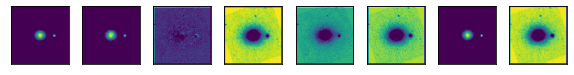

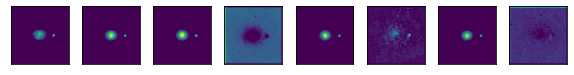

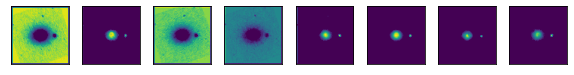

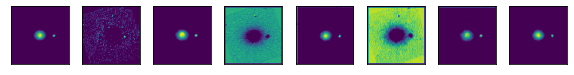

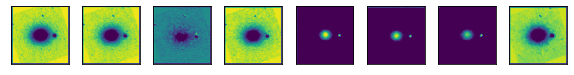

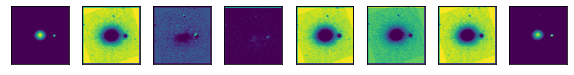

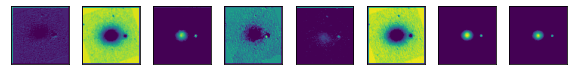

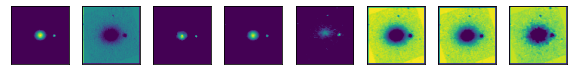

Block -  2
The output feature maps of this block (set of convolutional layers) are as follows -


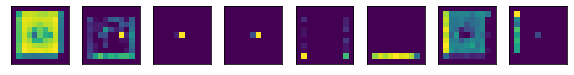

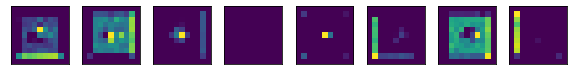

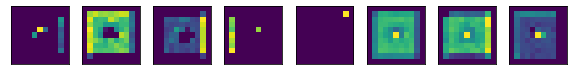

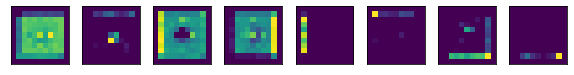

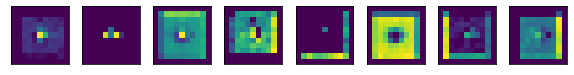

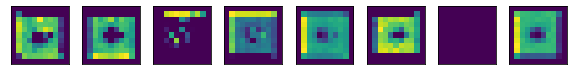

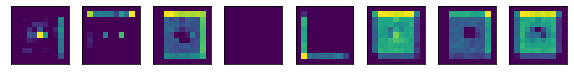

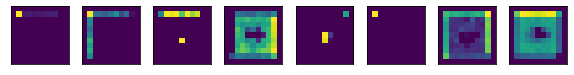

Block -  3
The output feature maps of this block (set of convolutional layers) are as follows -


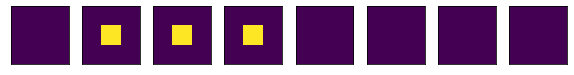

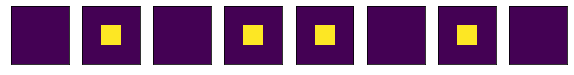

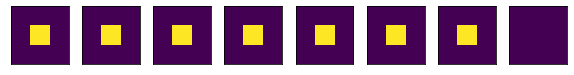

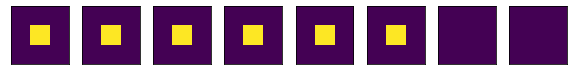

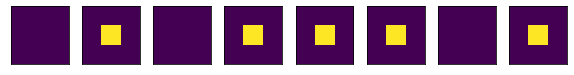

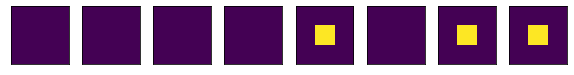

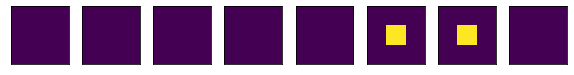

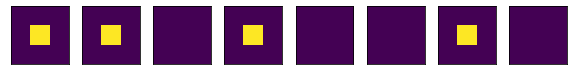

Block -  4
The output feature maps of this block (set of convolutional layers) are as follows -


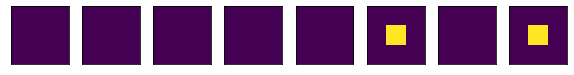

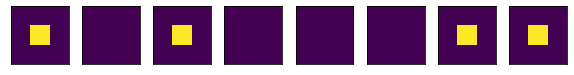

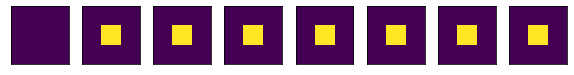

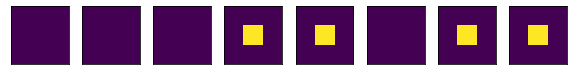

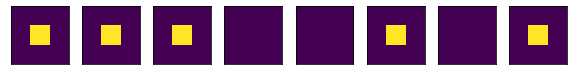

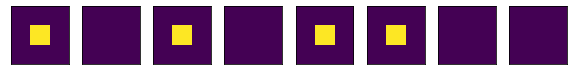

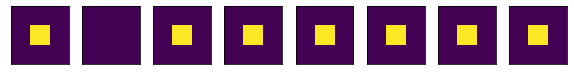

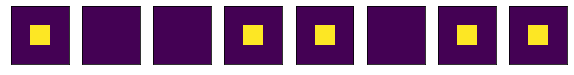

Block -  5
The output feature maps of this block (set of convolutional layers) are as follows -


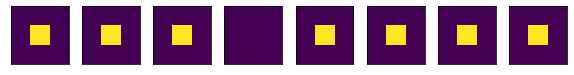

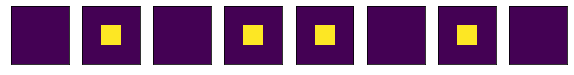

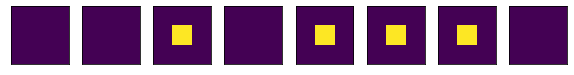

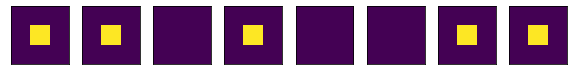

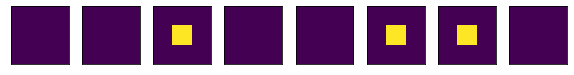

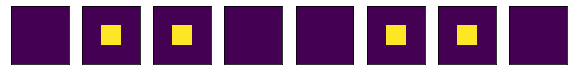

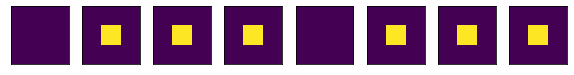

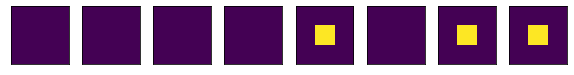

In [13]:
blocks = [3, 8, 15, 22, 29]
outputs = [model.layers[i].output for i in blocks]
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(image)
# plot the output from each block
square = 8

blk=1
for fmap in feature_maps:
# plot all 64 maps in an 8x8 squares
  i = 1
  for x in range(square):
    plt.figure(figsize=(10,10))
    for x in range(square):
# specify subplot and turn of axis
      ax = plt.subplot(square, square, i)
      ax.set_xticks([])
      ax.set_yticks([])
# plot filter channel in grayscale
      
      plt.imshow(fmap[0, :, :, i-1])
      i += 1
  print('Block - ',blk,)
  blk=blk+1
  print('The output feature maps of this block (set of convolutional layers) are as follows -')
  
# show the figure
  plt.show()